# PREGUNTA 1:
## Generar una red neuronal (sin librerias) con tasa de aprendizaje 0.4, cuyo gradiente se refleje en el dataset iris ¿cuantas epocas requirio?

Primero importamos las librerías necesarias

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Semilla aleatoria para poder repetir el resultado

In [35]:
np.random.seed(42)

Importar el dataset de iris

In [36]:
iris = pd.read_csv('iris.csv') 
print(iris.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


Podemos ver una muestra aleatoria de este dataset

In [37]:
print(iris.sample(10))

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
73    74            6.1           2.8            4.7           1.2   
18    19            5.7           3.8            1.7           0.3   
118  119            7.7           2.6            6.9           2.3   
78    79            6.0           2.9            4.5           1.5   
76    77            6.8           2.8            4.8           1.4   
31    32            5.4           3.4            1.5           0.4   
64    65            5.6           2.9            3.6           1.3   
141  142            6.9           3.1            5.1           2.3   
68    69            6.2           2.2            4.5           1.5   
82    83            5.8           2.7            3.9           1.2   

             Species  
73   Iris-versicolor  
18       Iris-setosa  
118   Iris-virginica  
78   Iris-versicolor  
76   Iris-versicolor  
31       Iris-setosa  
64   Iris-versicolor  
141   Iris-virginica  
68   Iris-versicolor  

Podemos ver como se distribuyen los datos

<Figure size 1000x800 with 0 Axes>

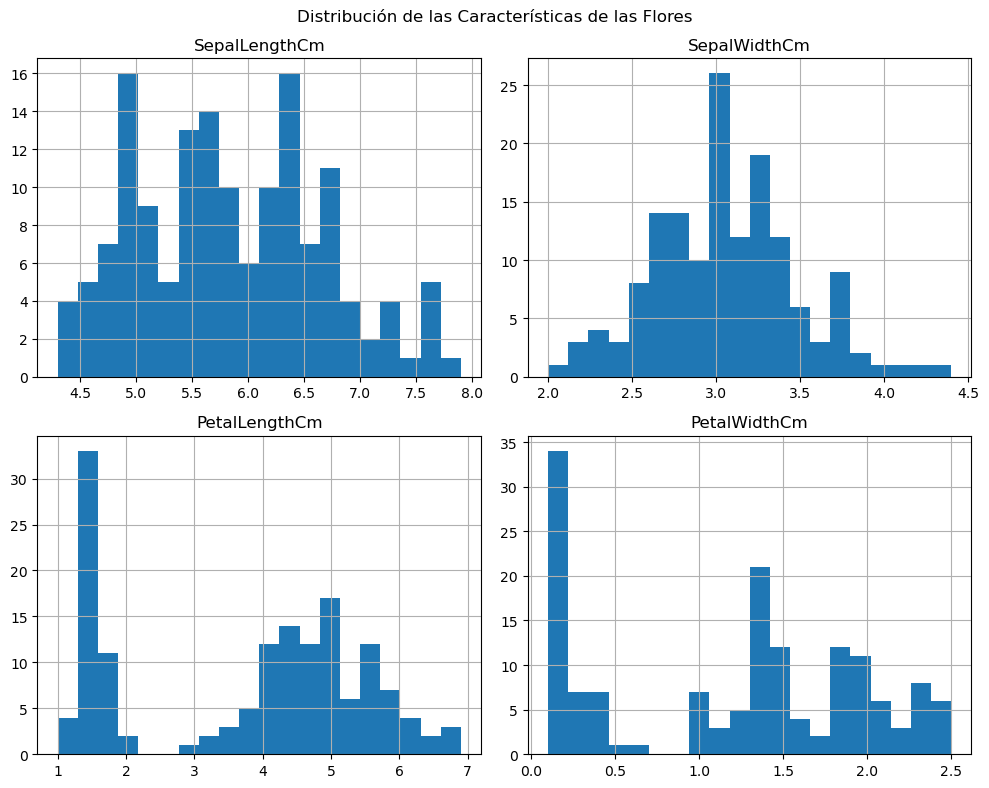

In [38]:
iris_features = iris.drop(columns=['Id', 'Species'])

plt.figure(figsize=(10, 8))
iris_features.hist(bins=20, figsize=(10, 8))
plt.suptitle('Distribución de las Características de las Flores')
plt.tight_layout()
plt.show()


Como son muchas caracteristicas, podemos ver el gráficos por pares o tambien llamado **pairplot**

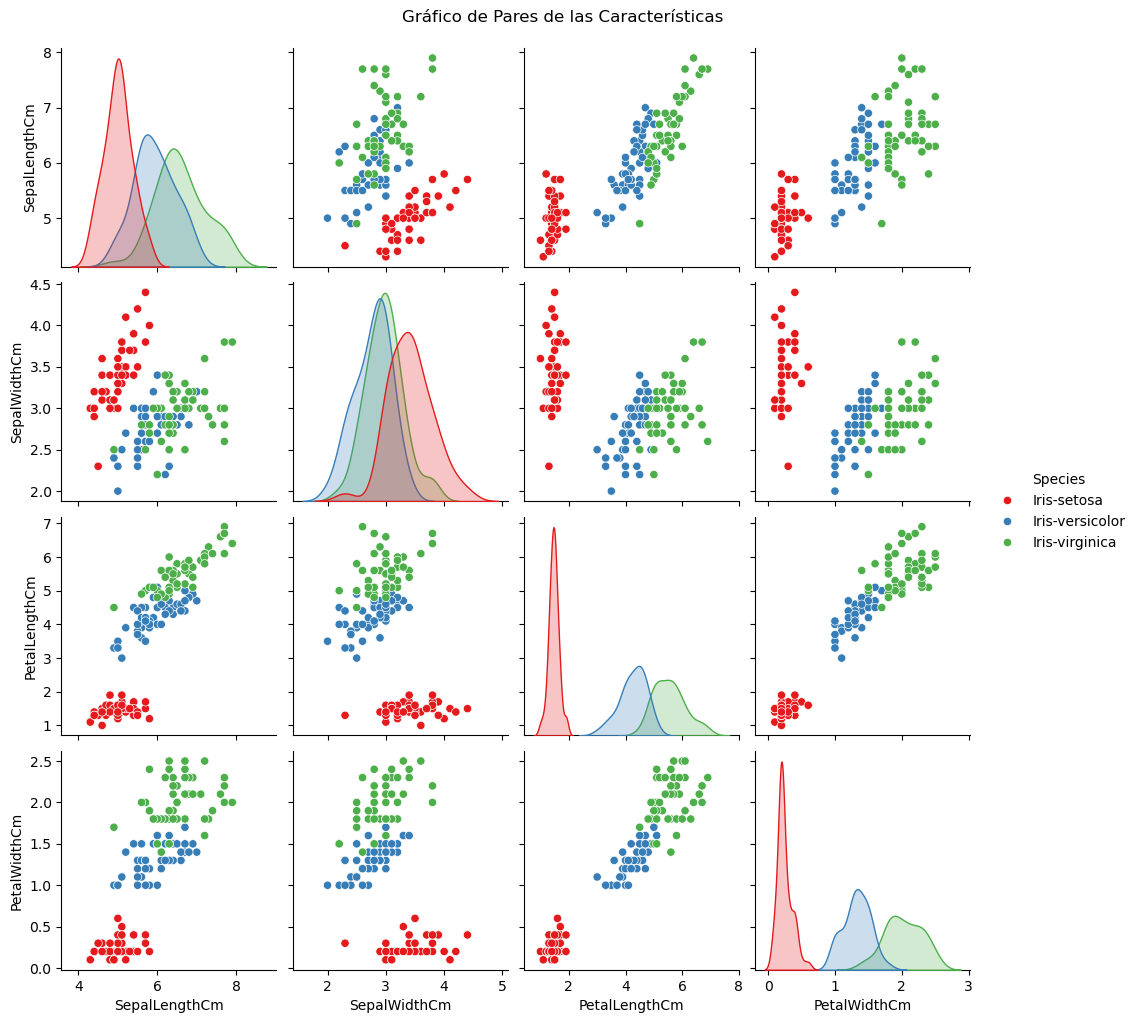

In [39]:
sns.pairplot(iris.drop(columns=['Id']), hue='Species', palette='Set1')
plt.suptitle('Gráfico de Pares de las Características', y=1.02)
plt.show()


Estamos ante un aprendizaje supervisado, asi que dividimos los datos en $X$ y en $y$ para. Lo que buscamos es la función $f$ con la ayuda de los puntos $(X, f(X))$, osea $(X,y)$. Así tomamos las primeras columnas como $X$ y la última como $y$ (la columna de *Species*)

In [40]:
X = iris.iloc[:, 1:5].values
y = iris['Species'].values

print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)

Dimensiones de X: (150, 4)
Dimensiones de y: (150,)


Ahora debemos de hacer un **one hot encoder** ya que los valores de la columna *Species* es:
- Iris-setosa
- Iris-versicolor
- Iris-virginica

Y una red neuronal no puede trabajar con valores **cualitativos**, sino **cuantitativos**. Para ello hacemos un **one hot encoder** para que los valores queden como:
- 0
- 1
- 2

Así lo que hacemos es:

In [41]:
unique_classes, indices = np.unique(y, return_inverse=True)

In [42]:
print(unique_classes)
print(indices)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Ahora lo que hacemos es hacer un mapeo de estos indices y creamos una matriz de puros 0's y 1's. 

In [43]:
y_onehot = np.eye(len(unique_classes))[indices]
print(y_onehot.shape)

(150, 3)


Ahora sacaremos algunas muestras aleatorias para ver como es la forma de esta matriz

In [44]:
index = np.random.choice(y_onehot.shape[0], 10, replace=False)
for i in index:
    print(y_onehot[i])

[0. 1. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 0.]
[0. 1. 0.]


Por otro lado debemos normalizar los valores de $X$ para que sea más fácil de entrenar y tenga estabilidad numérica. Lo que haremos será usar la estandarización:

<p align="center">
    <img src="image.png" align="center" width="250"/>
</p>


In [45]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

Selecionamos una muestra aleatoria para ver como quedaron los valores

In [46]:
index = np.random.choice(X.shape[0], 10, replace=False)
for i in index:
    print(X[i])

[ 0.79566902 -0.58776353  0.47843012  0.39617188]
[ 0.31099753 -0.58776353  0.1372359   0.13322594]
[2.24968346 1.72626612 1.67260991 1.31648267]
[-1.26418478  0.10644536 -1.227541   -1.31297673]
[ 0.91683689 -0.35636057  0.47843012  0.13322594]
[-0.41600969 -1.51337539 -0.03336121 -0.26119297]
[-0.53717756  1.49486315 -1.2844067  -1.31297673]
[-0.29484182 -0.35636057 -0.09022692  0.13322594]
[0.67450115 0.33784833 0.42156442 0.39617188]
[-0.7795133   0.80065426 -1.3412724  -1.31297673]


Esta es la funcion para dividir los datos en dos:
- Datos de entrenamiento
- Datos de validación

Lo que hace este código es:
1. Crear un array de los indices y mezclarlos
2. Determinar el tamaño de los datos de prueba
3. Dividir los índices en los tamaños establecidos
4. Ahora que tenemos los indices divididos, creamos los datos de prueba y entrenamiento y los retornamos

In [47]:
def train_test_split(X, y, test_size=0.2):

    indices = np.arange(len(X))
    np.random.shuffle(indices)

    test_size = int(len(X) * test_size)
    
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

Dividimos en datos de prueba y entrenamiento

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2)

print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)


Dimensiones de X_train: (120, 4)
Dimensiones de X_test: (30, 4)
Dimensiones de y_train: (120, 3)
Dimensiones de y_test: (30, 3)


Ahora iniciamos loa parámetros de la red neuronal. Los parámetros son:
- Número de características
- Tamaño de la capa oculta
- Número de salida (como son tres clases, entonces la salida es tres)

In [49]:
input_size = X_train.shape[1]
hidden_size = 5
output_size = y_train.shape[1]

Definimos los pesos y sesgos. Para ello veamos la siguiente figura de lo que es una neurona artificial:

<p align="center">
    <img src="image-1.png" align="center" width="250"/>
</p>

Así tendremos las neuronas $n_1$ y $n_2$ que tendrán los pesos $W_1$, $W_2$ y los *bias* (sesgos) $b_1$ y $b_2$. Por lo tanto cada neurona será de la forma $n_{i} = F_{i}(W_{i}x_{i}+b_{i})$.

Para construir la neuronas lo que hacemos es usar matrices. Creamos las matrices de pesos y sesgos. Nuestra red neuronal será de la forma:

$$
W_1=\begin{bmatrix}
w_{11}^{(1)} & w_{12}^{(1)}  & w_{13}^{(1)} & w_{14}^{(1)} & w_{15}^{(1)} \\

w_{21}^{(1)} & w_{22}^{(1)}  & w_{23}^{(1)} & w_{24}^{(1)} & w_{25}^{(1)} \\

w_{31}^{(1)} & w_{32}^{(1)}  & w_{33}^{(1)} & w_{34}^{(1)} & w_{35}^{(1)} \\

w_{41}^{(1)} & w_{42}^{(1)}  & w_{43}^{(1)} & w_{44}^{(1)} & w_{45}^{(1)} \\
\end{bmatrix}
$$

$$
b_1 = \begin{bmatrix}
\beta_{11}^{(1)} \\
\beta_{12}^{(1)} \\
\beta_{13}^{(1)} \\
\beta_{14}^{(1)} \\
\beta_{15}^{(1)} \\
\end{bmatrix}
$$

$$
W_2=\begin{bmatrix}
w_{11}^{(2)} & w_{12}^{(2)} & w_{13}^{(2)}
\end{bmatrix}
$$

$$
b_2 = \begin{bmatrix}
\beta_{11}^{(2)} \\
\beta_{12}^{(2)} \\
\beta_{13}^{(2)} \\
\beta_{14}^{(2)} \\
\beta_{15}^{(2)} \\
\end{bmatrix}
$$

Por lo tanto la red neuronal es:

$$
N(x) = f(W_2 \cdot f(W_1 \cdot x + b_1) + b_2)
$$

Donde $f$ es la función de activación y $W_1$ y $W_2$ son los pesos con los sesgos $b_1$ y $b_2$

In [50]:
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))


In [51]:
print(f"Peso W1: {W1.shape}")
print(f"Sesgo b1: {b1.shape}")
print(f"Peso W2: {W2.shape}")
print(f"Sesgo b2: {b2.shape}")

Peso W1: (4, 5)
Sesgo b1: (1, 5)
Peso W2: (5, 3)
Sesgo b2: (1, 3)


Esta será nuestra función de activación, la función *relu*

<p align="center">
    <img src="image-2.png" align="center" width="300"/>
</p>


In [52]:
def relu(Z):
    return np.maximum(0, Z)

Y para calcular los pesos necesitamos la derivada

<p align="center">
    <img src="image-3.png" align="center" width="500"/>
</p>

In [53]:
def relu_derivative(Z):
    return (Z > 0).astype(float)

Usaremos tambien la función *softmax* para la estabilidad numérica

<p align="center">
    <img src="image-4.png" align="center" width="500"/>
</p>

In [54]:
def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return expZ / np.sum(expZ, axis=1, keepdims=True)

Ahora para calcular la pérdida usamos la función de entropía cruzada, o *cross entropy* en inglés

<p align="center">
    <img src="image-5.png" align="center" width="600"/>
</p>


In [55]:
def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-8)) / m
    return loss


Ahora establecemos el *learning rate* o tasa de aprendizaje que definira que tan rápido aprende nuestra red neuronal, y con que precisión

<p align="center">
    <img src="image-6.png" align="center" width="500"/>
</p>


In [56]:
learning_rate = 0.4

Definimos en número de epocas o *epochs* y luego un array para almacenar las pérdidas

In [57]:
epochs = 1000
losses = []

Finalmente haremos el entrenamiento, para lo cual se hará:

1. **Propagación hacia adelante**

Para eso ponemos en funcionamiento nuestra red neuronal con la siguiente fórmula: $N(x) = f(W_2 \cdot f(W_1 \cdot x + b_1) + b_2)$

2. **Calcular la pérdida**

Para eso usamos las funciones que ya definimos `compute_loss()` que básicamente es la función *cross entropy* y la agregamos al array

3. **Backpropagation**

Hacemos *backpropagation* o retropropagación. Para ello proseguiremos a explicar parte de el:

- `m` es el número de elementos de entrenamiento
- `X_train`son los datos de entrenamiento
- `y_train`son las etiquetas, o la clase

Luego:

- **`dZ2`**: Es la diferencia entre el resultado obtenido en la capa de salida (`A2`) y el resultado real (`y_train`). Este término representa el error en la capa de salida y se utiliza para calcular el gradiente con respecto a los pesos y sesgos de la capa de salida. En términos simples, `dZ2 = A2 - y_train` es el error directo de la predicción.

- **`dW2`**: Representa el gradiente de los pesos `W2` de la capa de salida. Captura cuánto contribuyó cada neurona en la capa oculta al error en la capa de salida, ponderado por las activaciones de la capa oculta (`A1`). Es calculado como el producto del error `dZ2` con las activaciones de la capa anterior (`A1`), y luego se divide entre el número de ejemplos de entrenamiento (`m`) para normalizarlo: `dW2 = np.dot(A1.T, dZ2) / m`.

- **`db2`**: Es el gradiente del sesgo `b2` en la capa de salida. Resume los errores de cada neurona en todos los ejemplos de entrenamiento, sumando los valores de `dZ2` a lo largo de todas las muestras. Este valor se divide por `m` para obtener el promedio: `db2 = np.sum(dZ2, axis=0, keepdims=True) / m`.

- **`dA1`**: Es el gradiente de la activación `A1` de la capa oculta. Indica cuánto afecta el error en la capa de salida (`dZ2`) a la activación de la capa oculta. Se obtiene multiplicando el error en la capa de salida (`dZ2`) por los pesos transpuestos de la capa de salida (`W2`): `dA1 = np.dot(dZ2, W2.T)`.

- **`dZ1`**: Representa el error en la capa oculta. Para calcular este valor, se multiplica el gradiente de la activación `dA1` por la derivada de la función de activación de la capa oculta (en este caso, la derivada de ReLU). Esto se hace para ajustar los pesos y sesgos en la capa oculta con respecto al error en la salida: `dZ1 = dA1 * relu_derivative(Z1)`.

- **`dW1`**: Es el gradiente de los pesos `W1` de la capa oculta. Se calcula de manera similar a `dW2`, pero en este caso, se multiplica el error en la capa oculta (`dZ1`) por las entradas de la red (`X_train`). Luego, se divide por `m` para normalizar el valor: `dW1 = np.dot(X_train.T, dZ1) / m`.

- **`db1`**: Es el gradiente del sesgo `b1` en la capa oculta. Al igual que `db2`, este valor resume los errores de todas las neuronas de la capa oculta para todos los ejemplos de entrenamiento, sumando los valores de `dZ1` y normalizando dividiendo por `m`: `db1 = np.sum(dZ1, axis=0, keepdims=True) / m`.


4. **Actualización de pesos**

Actualizamos los pesos restando el producto de los valores encontrados y la tasa de aprendizaje

5. **Mostrar progreso**

Mostramos el progreso del entrenamiento cada 100 épocas

In [58]:

for epoch in range(epochs):
    # Propagación hacia adelante
    Z1 = np.dot(X_train, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    
    # Pérdida
    loss = compute_loss(y_train, A2)
    losses.append(loss)
    
    # Retropropagación
    m = X_train.shape[0]
    dZ2 = A2 - y_train
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X_train.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    
    # Actualización de parámetros
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    
    # Mostrar progreso
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 1.0987
Epoch 100, Loss: 0.1192
Epoch 200, Loss: 0.0629
Epoch 300, Loss: 0.0521
Epoch 400, Loss: 0.0475
Epoch 500, Loss: 0.0449
Epoch 600, Loss: 0.0432
Epoch 700, Loss: 0.0420
Epoch 800, Loss: 0.0410
Epoch 900, Loss: 0.0402


Visualizaremos como fue el proceso de aprendizaje y entrenamieto

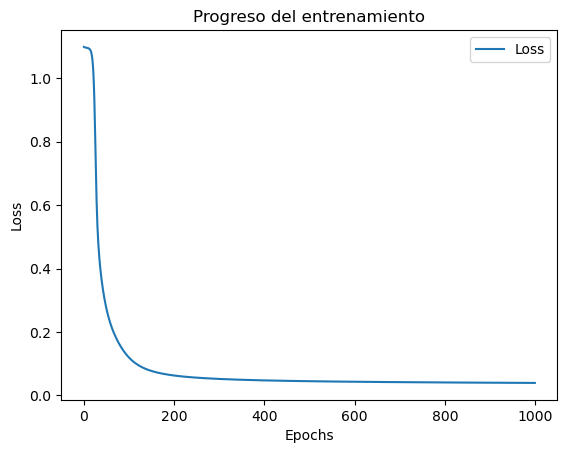

In [59]:
plt.plot(range(epochs), losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Progreso del entrenamiento')
plt.legend()
plt.show()

Evaluamos el modelo:

In [60]:
Z1_test = np.dot(X_test, W1) + b1
A1_test = relu(Z1_test)
Z2_test = np.dot(A1_test, W2) + b2
A2_test = softmax(Z2_test)

Tomamos las predicciones del modelo y las predicciones reales

In [61]:
y_pred = np.argmax(A2_test, axis=1)
y_true = np.argmax(y_test, axis=1)

Graficamos para ver el resultado

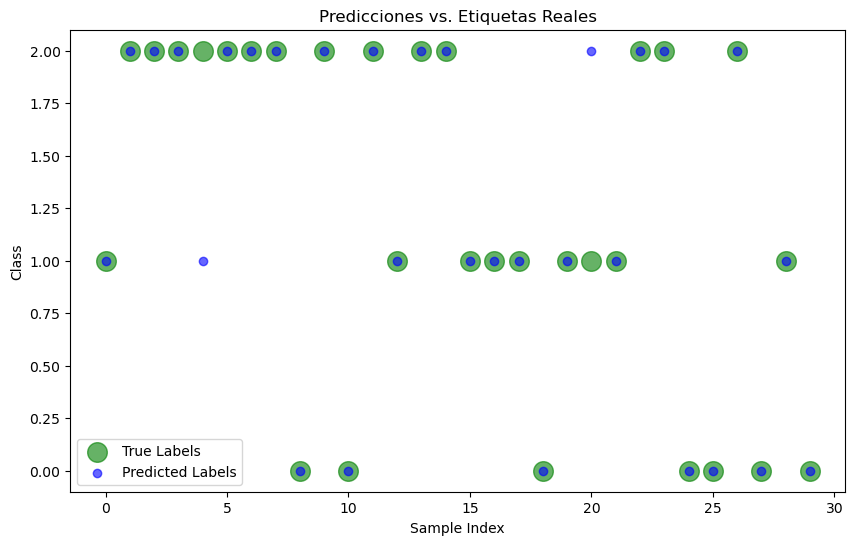

In [62]:

# Comparar predicciones con etiquetas reales
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_true, s=200, color='green', label='True Labels', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted Labels', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Predicciones vs. Etiquetas Reales')
plt.legend()
plt.show()

Podemos calcular la presición

In [63]:
accuracy = np.mean(y_true == y_pred)

Y la perdida de *cross entropy*

In [64]:
m = y_test.shape[0]
loss = -np.sum(y_test * np.log(A2_test + 1e-9)) / m

Así tenemos

In [65]:
print(f"Accuracy: {accuracy}")
print(f"Loss: {loss}")

Accuracy: 0.9333333333333333
Loss: 0.16758897928279584
